In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Partie 1

In [2]:
## Question 1

# p est le vecteur des probabilités correspondant à la loi de X
# x est le vecteur des valeurs possibles pour X
# M est le nombre désiré de simulation de la variable X 
def sim_dis (p, x, M):
    y = []
    for i in range(0, M):
        u = np.random.uniform(0, 1)
        j = 1
        while ( u > np.sum(p[:j]) ):
            j += 1
        y.append(x[j-1])
    return y

In [3]:
## Test

x = [ i for i in range(10)]
probas = np.random.dirichlet(np.ones(10))

print("Considérons le vecteur x = range(0,10) des valeurs souhaitées ainsi que")
print("probas = {} l'ensemble des probabilités correspondantes".format(probas))

print("On a alors la simulation {} pour un échantillon de taille 10".format(sim_dis(probas, x, 10)))


Considérons le vecteur x = range(0,10) des valeurs souhaitées ainsi que
probas = [0.00437941 0.1352391  0.30622147 0.07422926 0.005812   0.06680523
 0.09760922 0.19683417 0.02763351 0.08523663] l'ensemble des probabilités correspondantes
On a alors la simulation [7, 5, 1, 7, 1, 1, 2, 7, 3, 2] pour un échantillon de taille 10


In [4]:
## Question 2

def simulation_marche(N=100, S0=5, p=0.5, M=1000):
    R = np.zeros((N + 1,M))
    R[0] = S0
    for n in range(1, N + 1):
        sim = sim_dis([p, 1-p], [1, -1], M)
        R[n] = R[n - 1] + sim
    return R


def simulation_visuelle_trajectoire(N2= 100, M2=10):
    arr = simulation_marche(M=M2)
    for i in range(0, M2):
        plt.plot(np.linspace(0, N2, N2+1), arr[:,i])
    plt.show()


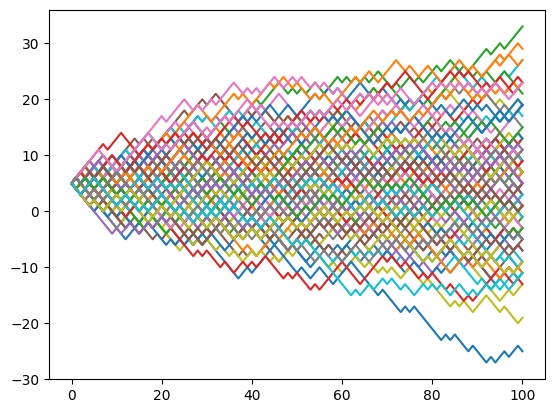

In [5]:
## Test 

simulation_visuelle_trajectoire(M2 = 100)

In [6]:
## Question 3

def Q3_monte_carlo(N3=100, M3=1000):
    sim = simulation_marche(N=N3, M=M3)[-1]
    return sum(sim >= 5)/M3

testQ3 = Q3_monte_carlo()
print("Une estimation de la probabilité par la méthode de Monte Carlo que S_N >= 5 est {}".format(testQ3))

Une estimation de la probabilité par la méthode de Monte Carlo que S_N >= 5 est 0.546


#### Détermination de l'intervalle de confiance Q3

Pour déterminer l'intervalle de confiance à 95% de notre estimation $S_N \ge 5$, on remarque que:
- En posant une fonction indicatrice $\forall k \in [1; M], Y_k = \mathbb{1}_{S_N^k \ge 5}$, alors
    $$
    Y_k = \left\{ {1, \text{si } S_N^k \ge 5 \atop 0, \text{sinon}}\right.
    $$
- Or, la probabilité qu'on recherche est $\mathbb{P}(S_N^k \ge 5) = p_k$, et par propriété de la fonction indicatrice,
$\mathbb{E}(Y_k) = p$ et $Y_k \sim \mathcal{B}(1, p_k)$.
- De plus, les $Y_k$ étant iid, tous les $p_k$ sont égaux, donc on a $\forall k \in [1, M], p_k = p$ et 
$$
\forall k \in [1, M], Y_k \sim \mathcal{B}(1, p)
$$.


Etudions $\hat Y_M = \frac{1}{M}\sum_{k=1}^{M}(Y_k)$
- On a $\mathbb{E}(\hat Y_M) = \frac{1}{M}\sum_{k=1}^{M}\mathbb{E}(Y_k) =\frac{1}{M}\sum_{k=1}^{M} \mathbb{P}(S_N^k \ge 5) = \mathbb{P}(S_N^k \ge 5) = p$ car les $S_N^k$ sont iid. D'où $\hat Y_M$ est sans biais.
- On a $\mathbb{V}(\hat Y_M) = \frac{1}{M^2} * M *\mathbb{V}(Y_1) = \frac{1}{M} * [ \mathbb{E}(\mathbb{1}_{S_N^k \ge 5})^2  -  (\mathbb{E}(\mathbb{1}_{S_N^k \ge 5}))^2] = \frac{1}{M}*p*(1-p)$


D'après le théorème central limite:
$$
\sqrt{\frac{M}{p(1-p)}}|\hat Y_M - p | {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Or, par la loi forte des grands nombres,  $\hat Y_M {\overset{\mathbb{P}}{\longrightarrow}} \mathbb{E}(Y_1) = p$
D'où par continuité des fonctions,
$$
\sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}|\hat Y_M - p | {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Donc par propriété sur les quantiles de la loi normale centrée réduite, en posant $q_{1 -\alpha} = - q_{\alpha} = 1.96$, avec $\alpha = 0.05$, et on a:
- $\mathbb{P} (-1.96 \le \sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}\hat Y_M - p  \le 1.96) = 1 - \alpha = 95\%$
- $\mathbb{P} (\hat Y_M -1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}} \le p  \le \hat Y_M + 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}) = 95\%$

Un intervalle de confiance à 95% de notre estimation est donc $[\hat Y_M \pm 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}]$


#### Détermination de la vraie probabilité p pour N = 100

Si N avait été impair, alors la probabilité $S_N = 5$ est nulle donc $S_N \ge 5 = S_N \gt 5 = S_N \lt 5 = 0.5$
Ici, N est pair, donc montrons par récurrence que la valeur de p vaut $\frac{N+1}{2N}$:
- pour N = 2: Les issues possibles de S_2 sont 3, 5, 5 et 7, et les chemins sont équiprobables; donc $\mathbb(P)(S_2 = 3) = 1/4$, $\mathbb(P)(S_2 = 5) = 1/2$ et $\mathbb(P)(S_2 = 7) = 1/4$, donc $\mathbb(P)(S_2 \ge 5) = 3/4 = \frac{2+1}{2*2}$.
- Supposons l'hypothèse de récurrence vraie pour un range N fixé et montrons qu'elle reste vraie au range N + 2:
Au rang N + 1, le cas $S_2 = 5$ est impossible donc de probabilité nulle, et il y a N + 2 issues possibles.
Au rang N + 2, les (N + 2)/2 issues supérieures strictement à 5 vont toujours rester supérieurs ou égaux à 5 ( $S_{N+1}$ est différent de 5 et si $S_{N+1} = 6$ alors $S_{N+2} \ge 5$ ; de même pour $S_{N+1} \gt 6$);
et les (N+2)/2 issues inférieures strictement à 5 vont rester inférieurs ou égaux à 5 SAUF SI $S_{N+1} = 4$, auquel cas $S_{N+2} = 5$ avec une probabilité $(1/2)$ sachant $S_{N+1} = 4$, ou bien avec une probabilité $(1/2*(N+2))$.
Ainsi, $\mathbb(P)(S_{N+2} \ge 5) = 1/2 + (1/2*(N+2)) = \frac{N+3}{2*(N+2)}$. 

Par récurrence, on a alors que p vaut $\frac{N+1}{2N}$, donc pour N = 100, on a p = 101/200 = 0.505.

In [7]:
print("Ici, notre probabilité empirique est de {} et la vraie valeur est 0.505 pour M = 1000".format(testQ3))
if (0.505 > testQ3 + 1.96 * (testQ3*(1-testQ3)/1000)**(1/2) or 0.505 < testQ3 - 1.96 * (testQ3*(1-testQ3)/1000)**(1/2)):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")

Ici, notre probabilité empirique est de 0.546 et la vraie valeur est 0.505 pour M = 1000
La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%


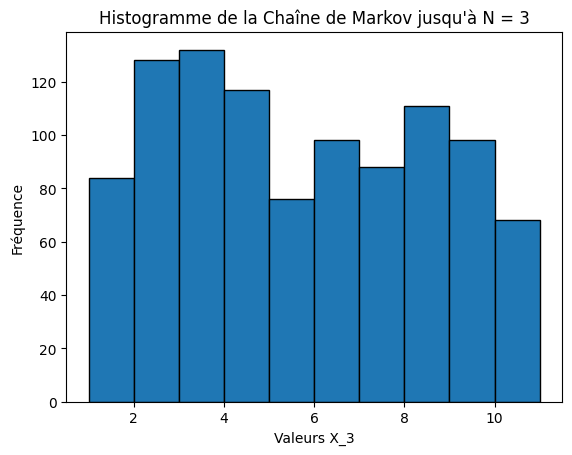

In [8]:
## Question 4

P = np.random.random((10, 10)) # Matrice de transition
P = P/np.sum(P, axis=1)[:, None] # Normalisation des lignes, pour avoir une matrice stochastique

def Q4_chaine_markov(P4=P, N4=3, M4=1000):
    Mat = np.zeros((N4 + 1, M4), dtype=int)
    Mat[0] = 1
    for n in range(1, N4 + 1):
        for m in range(0, M4):
            s = sim_dis(P4[(Mat[n-1, m]) - 1], np.linspace(1, 10, 10, dtype=int), 1)
            Mat[n, m] = s[0]
    return Mat

plt.hist(Q4_chaine_markov()[-1], range=(1, 11), edgecolor='black', linewidth=1)
plt.xlabel("Valeurs X_3")
plt.ylabel("Fréquence")
plt.title("Histogramme de la Chaîne de Markov jusqu'à N = 3")
plt.show()

In [9]:
## Question 5

def Q5_monte_carlo(N5=3, M5=1000):
    sim = Q4_chaine_markov(N4=N5, M4=M5)[-1]
    return sum(sim == 10)/M5

testQ5 = Q5_monte_carlo()
print("Une estimation de la probabilité par la méthode de Monte Carlo que X_3 = 10 est {}".format(testQ5))

Une estimation de la probabilité par la méthode de Monte Carlo que X_3 = 10 est 0.088


#### Détermination de l'intervalle de confiance Q5

Pour déterminer l'intervalle de confiance à 95% de notre estimation $X_3 = 10$, on remarque que:
- En posant une fonction indicatrice $\forall k \in [1; M], Y_k = \mathbb{1}_{X_3^k = 10}$, alors
    $$
    Y_k = \left\{ {1, \text{si } X_3 = 10 \atop 0, \text{sinon}}\right.
    $$
- Or, la probabilité qu'on recherche est $\mathbb{P}(X_3 = 10) = p_k$, et par propriété de la fonction indicatrice,
$\mathbb{E}(Y_k) = p$ et $Y_k \sim \mathcal{B}(1, p_k)$.
- De plus, les $Y_k$ étant iid, tous les $p_k$ sont égaux, donc on a $\forall k \in [1, M], p_k = p$ et 
$$
\forall k \in [1, M], Y_k \sim \mathcal{B}(1, p)
$$.


Etudions $\hat Y_M = \frac{1}{M}\sum_{k=1}^{M}(Y_k)$
- On a $\mathbb{E}(\hat Y_M) = \frac{1}{M}\sum_{k=1}^{M}\mathbb{E}(Y_k) =\frac{1}{M}\sum_{k=1}^{M} \mathbb{P}(X_3 = 10) = \mathbb{P}(X_3 = 10) = p$ car les $X_i^k$ sont iid. D'où $\hat Y_M$ est sans biais.
- On a $\mathbb{V}(\hat Y_M) = \frac{1}{M^2} * M *\mathbb{V}(Y_1) = \frac{1}{M} * [ \mathbb{E}(\mathbb{1}_{X_3 = 10})^2  -  (\mathbb{E}(\mathbb{1}_{X_3 = 10}))^2] = \frac{1}{M}*p*(1-p)$


D'après le théorème central limite:
$$
\sqrt{\frac{M}{p(1-p)}}|\hat Y_M - p | {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Or, par la loi forte des grands nombres,  $\hat Y_M {\overset{\mathbb{P}}{\longrightarrow}} \mathbb{E}(Y_1) = p$
D'où par continuité des fonctions,
$$
\sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}|\hat Y_M - p | {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Donc par propriété sur les quantiles de la loi normale centrée réduite, en posant $q_{1 -\alpha} = - q_{\alpha} = 1.96$, avec $\alpha = 0.05$, et on a:
- $\mathbb{P} (-1.96 \le \sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}\hat Y_M - p  \le 1.96) = 1 - \alpha = 95\%$
- $\mathbb{P} (\hat Y_M -1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}} \le p  \le \hat Y_M + 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}) = 95\%$

Un intervalle de confiance à 95% de notre estimation est donc $[\hat Y_M \pm 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}]$


#### Détermination de la vraie probabilité p avec la matrice de transition P

On cherche $\mathbb{P}(X_3 = 10)$
D'après les formules des probabilités totales, $\mathbb{P}(X_3 = 10)$ = $\sum_{i = 1}^{i = 10} (\mathbb{P}(X_3 = 10 | X_2 = i) * \mathbb{P}(X_2 = i))$ où | est le symbole pour les probabilités conditionnelles;
d'où en réappliquant les probabilités totales, $\mathbb{P}(X_3 = 10)$ = $\sum_{i = 1}^{i = 10} [\mathbb{P}(X_3 = 10 | X_2 = i) * \sum_{j = 1}^{j = 10}(\mathbb{P}(X_2 = i | X_1 = j)) * \mathbb{P}(X_1 = j)]$
En utilisant les notations de la matrice de transition P, avec $P_{i, j}$ la probabilité à la ième ligne et jème colonne de P, on a:
$$
\mathbb{P}(X_3 = 10) = \sum_{i = 1}^{i = 10} [P_{i, 10} * \sum_{j = 1}^{j = 10}(P_{j, i}) * P_{1, j}]
$$

In [10]:
print("Détermination de la vraie probabilité p:\n")
p = 0
for i in range (0, 10):
    for j in range (0, 10):
        p += P[i][9] * P[j][i] * P[0][j]
print("Ici, notre probabilité empirique est de {} et la vraie valeur est {} pour M = 1000".format(testQ5, p))
if (p > testQ5 + 1.96 * (testQ5*(1-testQ5)/1000)**(1/2) or p < testQ5 - 1.96 * (testQ5*(1-testQ5)/1000)**(1/2)):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")

Détermination de la vraie probabilité p:

Ici, notre probabilité empirique est de 0.088 et la vraie valeur est 0.0764530138894041 pour M = 1000
La vraie valeur est donc dans l'intervalle de confiance à 95%


In [11]:
## Question 6

print("On peut montrer par récurrence qu'avec N = 100, on cherche p = P^100_(1, 10) où P^100 est la matrice de transition P à la puissance 100")

P100 = P
for i in range(1, 100):
    P100 = np.dot(P, P100) # Pour mettre P à la puissance 100, on la multiplie par elle-même
p6 = P100[0][9]

print("Pour N = 100, on a:")
testQ6 = Q5_monte_carlo(N5=100)
print("Ici, notre probabilité empirique est de {} et la vraie valeur est {} pour M = 1000".format(testQ6, p6))
if (p6 > testQ6 + 1.96 / 2 / (1000)**(1/2) or p6 < testQ6 - 1.96 / 2 / (1000)**(1/2)):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")

On peut montrer par récurrence qu'avec N = 100, on cherche p = P^100_(1, 10) où P^100 est la matrice de transition P à la puissance 100
Pour N = 100, on a:
Ici, notre probabilité empirique est de 0.062 et la vraie valeur est 0.08350835873708805 pour M = 1000
La vraie valeur est donc dans l'intervalle de confiance à 95%


La moyenne empirique du temps de survie est de 22.44 tours.


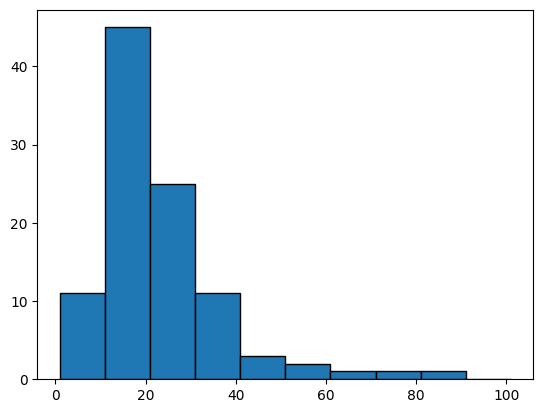

In [12]:
## Question 7

P7 = np.random.random((10, 10))
P7 = P7/np.sum(P7, axis=1)[:, None] # Normalisation des lignes, pour avoir une matrice stochastique

P7M = np.random.random((10, 10))
P7M = P7M/np.sum(P7M, axis=1)[:, None] # Normalisation des lignes, pour avoir une matrice stochastique


def death_time(Ne=5, Ns=10, P=P7, Q=P7M, N=100):
    Nb_tour = 1
    Nb_vivant = Ne
    Mat = np.zeros((N + 1, Ne), dtype=int)
    Mons = [Ns]
    Mat[0] = 1
    while (Nb_vivant > 0 and Nb_tour < N):
        s = sim_dis(Q[(Mons[-1]) - 1], np.linspace(1, 10, 10, dtype=int), 1) # Le monstre se déplace
        Mons.append(s[0])
        for m in range(0, Ne):
            if (Mat[Nb_tour-1, m] != -1):
                s = sim_dis(P[(Mat[Nb_tour-1, m]) - 1], np.linspace(1, 10, 10, dtype=int), 1)
                Mat[Nb_tour, m] = s[0]
                if (Mat[Nb_tour, m] == Mons[-1]):
                    Mat[Nb_tour, m] = -1
            else:
                Mat[Nb_tour, m] = -1
        Nb_vivant = sum(Mat[Nb_tour] != -1)
        Nb_tour += 1
    return Nb_tour - 1 # Car le premier tour n'est pas compté, c'est l'initialisation

Liste_temps = []
M = 100 # Nombre de simulation      
for i in range(0, M):
    Liste_temps.append(death_time())
plt.hist(Liste_temps, range=(1, 101), edgecolor='black', linewidth=1)
print("La moyenne empirique du temps de survie est de {} tours.".format(np.mean(Liste_temps)))

# Partie 2

In [13]:
## Question 1

def simulation_jeu(N= 100, X0= 5, a= 10, p= 0.5, M= 1000):
    R = np.zeros((N+1, M), dtype=int)
    R[0] = X0
    for n in range(1, N + 1):
        sim = sim_dis([p, 1-p], [1, -1], M)
        for m in range(0, M):
            if (R[n-1, m] == 0):
                R[n, m] = 0
            elif (R[n-1, m] == a):
                R[n, m] = a
            else:
                R[n, m] = R[n-1, m] + sim[m]
    return R


def simulation_visuelle_trajectoire_jeu(arr= simulation_jeu()):
    (N, M) = arr.shape
    for i in range(0, M):
        plt.plot(np.linspace(0, N-1, N), arr[:,i])
    plt.show()

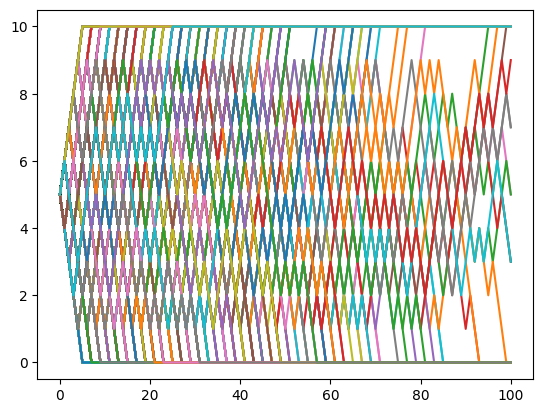

In [14]:
simulation_visuelle_trajectoire_jeu()

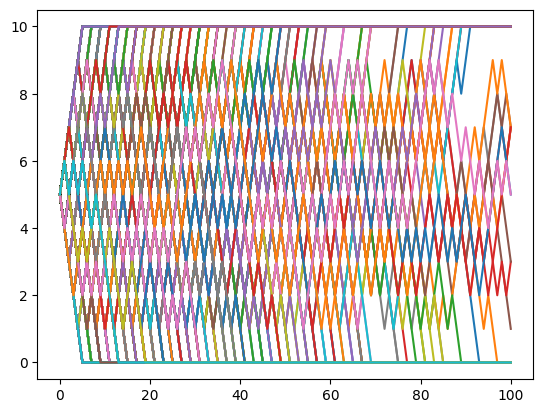

On a donc un p = 0.478


In [15]:
### a)

def tau_Q1(R, a= 10, N= 100, M= 1000): # R est la matrice de la question 1, de taille N+1 x M
    simulation_visuelle_trajectoire_jeu(R)
    T = np.zeros((M, 1), dtype=int)
    T = T + N + 1
    for m in range(0, M):
        for n in range(0, N+1):
            if (R[n, m] == 0 or R[n, m] == a):
                T[m] = n
                break
    return T

def Q1_a(R, a= 10, N= 100, M= 1000):
    T = tau_Q1(R, a, N, M)
    res = 0
    for i in range(0, M):
        if ( T[i] < N + 1 and R[T[i], i] == a):
            res += 1
    return res/M

test_Q1 = Q1_a(simulation_jeu())
print("On a donc un p = {}".format(test_Q1))
    

#### Détermination de l'intervalle de confiance Q1 a)

Pour déterminer l'intervalle de confiance à 95% de notre estimation {$\tau \le N  \ et \ X_\tau = a$}, on remarque que:
- En posant une fonction indicatrice $\forall k \in [1; M], Y_k = \mathbb{1}_{{\tau \le N  \ et \ X_\tau = a}}$, alors
    $$
    Y_k = \left\{ {1, \text{si } {\tau \le N  \ et \ X_\tau = a} \atop 0, \text{sinon}}\right.
    $$
- Or, la probabilité qu'on recherche est $\mathbb{P}(\tau \le N  \ et \ X_\tau = a) = p_k$, et par propriété de la fonction indicatrice,
$\mathbb{E}(Y_k) = p$ et $Y_k \sim \mathcal{B}(1, p_k)$.
- De plus, les $Y_k$ étant iid, tous les $p_k$ sont égaux, donc on a $\forall k \in [1, M], p_k = p$ et 
$$
\forall k \in [1, M], Y_k \sim \mathcal{B}(1, p)
$$.


Etudions $\hat Y_M = \frac{1}{M}\sum_{k=1}^{M}(Y_k)$
- On a $\mathbb{E}(\hat Y_M) = \frac{1}{M}\sum_{k=1}^{M}\mathbb{E}(Y_k) =\frac{1}{M}\sum_{k=1}^{M} \mathbb{P}(\tau \le N  \ et \ X_\tau = a) = \mathbb{P}(\tau \le N  \ et \ X_\tau = a) = p$ car les $S_N^k$ sont iid. D'où $\hat Y_M$ est sans biais.
- On a $\mathbb{V}(\hat Y_M) = \frac{1}{M^2} * M *\mathbb{V}(Y_1) = \frac{1}{M} * [ \mathbb{E}(\mathbb{1}_{\tau \le N  \ et \ X_\tau = a})^2  -  (\mathbb{E}(\mathbb{1}_{\tau \le N  \ et \ X_\tau = a}))^2] = \frac{1}{M}*p*(1-p)$


D'après le théorème central limite:
$$
\sqrt{\frac{M}{p(1-p)}}|\hat Y_M - p | {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Or, par la loi forte des grands nombres,  $\hat Y_M {\overset{\mathbb{P}}{\longrightarrow}} \mathbb{E}(Y_1) = p$
D'où par continuité des fonctions,
$$
\sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}|\hat Y_M - p | {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Donc par propriété sur les quantiles de la loi normale centrée réduite, en posant $q_{1 -\alpha/2} = - q_{\alpha/2} = 1.96$, avec $\alpha = 0.05$, et on a:
- $\mathbb{P} (-1.96 \le \sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}(\hat Y_M - p)  \le 1.96) = 1 - \alpha = 95\%$
- $\mathbb{P} (\hat Y_M -1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}} \le p  \le \hat Y_M + 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}) = 95\%$

Un intervalle de confiance à 95% de notre estimation est donc $[\hat Y_M \pm 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}]$


In [16]:
#### Calcul de la vraie valeur

F = np.zeros((9, 1))
P = np.zeros((9, 9))
for i in range(0, 9):
    if (i != 0):
        P[i, i-1] = 1/2
    if (i != 8):
        P[i, i+1] = 1/2

I = np.identity(9)
b = np.zeros((9, 1))
b[8] = 1/2

F = np.linalg.solve(I - P, b)
print("La vraie valeur théorique est : {}".format(F[4]))


print("Ici, notre probabilité empirique est de {} et la vraie valeur est 0.5 pour M = 1000".format(test_Q1))
z1 = test_Q1 - 1.96 * (test_Q1*(1-test_Q1)/1000)**(1/2)
z2 = test_Q1 + 1.96 * (test_Q1*(1-test_Q1)/1000)**(1/2)
print("L'intervalle de confiance à 95% est donc : [{}, {}]".format(z1, z2))
if (z1 > 0.5 or z2 < 0.5):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")


La vraie valeur théorique est : [0.5]
Ici, notre probabilité empirique est de 0.478 et la vraie valeur est 0.5 pour M = 1000
L'intervalle de confiance à 95% est donc : [0.44703969209455435, 0.5089603079054457]
La vraie valeur est donc dans l'intervalle de confiance à 95%


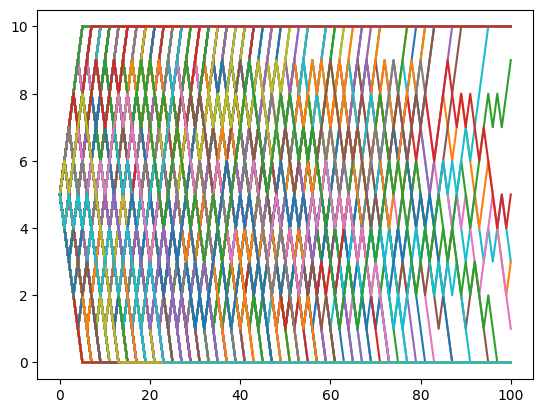

La moyenne empirique du temps de survie est de 24.156 tours.


In [17]:
### b)
tau_Q1_b = tau_Q1(simulation_jeu())
moyenne_tau = np.mean(tau_Q1_b)
print("La moyenne empirique du temps de survie est de {} tours.".format(moyenne_tau))
# C'est un nouvel échantillon mais M est assez grand pour qu'on suppose universel

#### Détermination de l'intervalle de confiance Q1 b)

Pour déterminer l'intervalle de confiance à 95% de notre estimation de la moyenne empirique, qu'on note $\hat \tau$, on remarque que:


- On a $\mathbb{E}(\hat \tau) = \mathbb{E}(\hat \tau) = \mu$
- On ne peut pas déterminer sa variance, on va donc étudier la loi de student.

$$
\sqrt{M} \frac{\hat \tau - \mu}{\sqrt{\frac{1}{M-1} \sum_{i = 1}^{M} (\tau_i - \tau_n)^2}} {\overset{Loi}{\longrightarrow}} \mathcal{T}(M-1)
$$


Donc par propriété sur les quantiles de la loi de Student, avec M = 1000, en posant $q_{1 -\alpha/2} = - q_{\alpha/2} = 1.96$ (La loi de Student approche la loi normale centrée réduite), avec $\alpha = 0.05$, et on a:
- $\mathbb{P} (-1.96 \le \sqrt{M} \frac{\hat \tau - \mu}{\sqrt{\frac{1}{M-1} \sum_{i = 1}^{M} (\tau_i - \tau_n)^2}} \le 1.96) = 1 - \alpha = 95\%$
- $\mathbb{P} (\hat \tau -1.96 * {\sqrt{\frac{1}{M^2-M} \sum_{i = 1}^{M} (\tau_i - \tau_n)^2}} \le \mu  \le \hat \tau + 1.96 * {\sqrt{\frac{1}{M^2-M} \sum_{i = 1}^{M} (\tau_i - \tau_n)^2}}) = 95\%$

Un intervalle de confiance à 95% de notre estimation est donc $[\hat \tau \pm 1.96 * {\sqrt{\frac{1}{M^2-M} \sum_{i = 1}^{M} (\tau_i - \tau_n)^2}}]$


### Détermination de l'espérance théorique réelle

On note $D(x) = \mathbb{E}(\tau | X_0 = x)$, la durée du jeu quand le capital initial est de x. Alors comme on étudie des chaînes de Markov, les situations sont indépendantes et si $x \in [1, ... , 9]$, on a la formule de récurrence suivante:

$$
D(x) = 1 + p*D(x+1) + (1-p)*D(x-1)
$$
(Preuve: Si $x \in [1, ... , 9]$, alors on doit lancer une pièce une fois donc la durée augmente de 1, elle sera de durée D(x+1) avec une proba p et de durée D(x-1) avec une proba (1-p))
Les conditions limites sont:  $D(0) = D(10) = 0$

On a donc l'équation 
$-1 = p(D(x+1) - D(x)) - (1-p)(D(x) - D(x-1))$
si $p = q = 1/2$, alors $-1 = 1/2 * (D(x+1) - 2D(x) + D(x-1))$
On pose $U_x = 1/2 * (D(x+1) - D(x))$ donc 
$-1 = U_x - U_{x-1}$ et ce pour tout $x \in [1, ... , 9],
Donc en sommant les expressions, on a 
$-(x-1) = 1/2 * U_x - 1/2 * U_1$
Donc $U_x = U_1 - 2(x-1)$

et on remarque que D(x) = \sum_{i = 1}^{x}(U_i), donc avec $U_1 = D(1)$:
$$
D(x) = x*D(1) - 2(\sum_{i = 1}^{x- 1}(i)) = x*D(1) - x(x-1)
$$
Avec les conditions limites, on a:
$$
D(x) = x * (10 - x)
$$

Ainsi dans notre situation, on a l'espérance réelle égale à $5 * (10 - 5) = 25$



In [18]:
## b) Estimation dans l'intervalle de confiance

print("Ici, notre moyenne empirique est de {} et la vraie valeur est 25 pour M = 1000".format(moyenne_tau))
M = 1000
b1 = moyenne_tau - 1.96 * (np.sum((tau_Q1_b[:-1] - tau_Q1_b[-1] )**2) / (M**2 - M))**(1/2)
b2 = moyenne_tau + 1.96 * (np.sum((tau_Q1_b[:-1] - tau_Q1_b[-1] )**2) / (M**2 - M))**(1/2)
print("L'intervalle de confiance à 95% est donc : [{}, {}]".format(b1, b2))
if (b1 > 25 or b2 < 25):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")


Ici, notre moyenne empirique est de 24.156 et la vraie valeur est 25 pour M = 1000
L'intervalle de confiance à 95% est donc : [22.998124315783382, 25.313875684216615]
La vraie valeur est donc dans l'intervalle de confiance à 95%


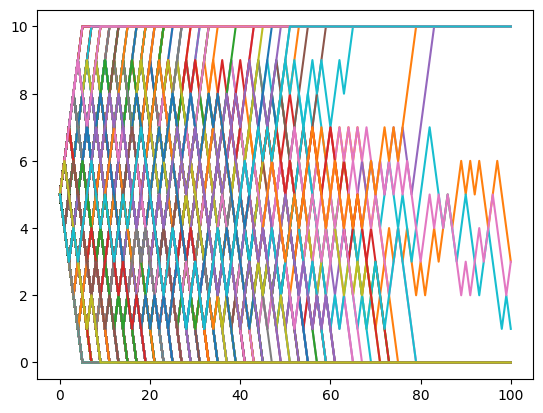

On a donc un p = 0.107
La vraie valeur théorique est : [0.11636364]
Ici, notre probabilité empirique est de 0.107 et la vraie valeur est 0.183 pour M = 1000
L'intervalle de confiance à 95% est donc : [0.08784096240412896, 0.12615903759587105]
La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%


In [21]:
### c)

test_Q1_c = Q1_a(simulation_jeu(p= 0.4))
print("On a donc un p = {}".format(test_Q1_c))


#### Calcul de la vraie valeur

F = np.zeros((9, 1))
P = np.zeros((9, 9))
for i in range(0, 9):
    if (i != 0):
        P[i, i-1] = 0.6
    if (i != 8):
        P[i, i+1] = 0.4

I = np.identity(9)
b = np.zeros((9, 1))
b[8] = 0.4

F = np.linalg.solve(I - P, b)
print("La vraie valeur théorique est : {}".format(F[4]))


print("Ici, notre probabilité empirique est de {} et la vraie valeur est 0.183 pour M = 1000".format(test_Q1_c))
z1 = test_Q1_c - 1.96 * (test_Q1_c*(1-test_Q1_c)/1000)**(1/2)
z2 = test_Q1_c + 1.96 * (test_Q1_c*(1-test_Q1_c)/1000)**(1/2)
print("L'intervalle de confiance à 95% est donc : [{}, {}]".format(z1, z2))
if (z1 > 0.183 or z2 < 0.183):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")